<a href="https://www.kaggle.com/code/chaitanyachandra/03-ml-multi-linear-regression?scriptVersionId=263025800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Multiple Linear Regression

* for multiple features (independent variables)

$
\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$

### Explanation:

* **$\hat{y}$** → The **predicted output** (dependent variable)  
* **$x_1, x_2, \dots, x_n$** → The **input features** (independent variables)  
* **$b_0$** → The **intercept (constant term)** when all features are $0$  
* **$b_1, b_2, \dots, b_n$** → The **coefficients/slopes** (measure of how much $Y$ changes when the corresponding feature increases by 1, keeping others constant)  
* **Error (residual)** = $y - \hat{y}$  

This is an extension of:

$
y = mx + b
$

but with multiple inputs (instead of just one slope, we have many).


### What it means:

It tells us that the output depends **linearly on several input variables at once** — each feature contributes to the prediction according to its coefficient.  


### Example: Chocolate + Toffee Cost

Suppose you buy chocolates and toffees:

* **Each chocolate costs ₹10**  
* **Each toffee costs ₹2**  
* **There is a fixed packaging fee of ₹5**  

The formula becomes:

$
\text{Total Cost (Y)} = 5 + 10 \cdot x_1 + 2 \cdot x_2
$

Where:  
* $x_1$ = number of chocolates  
* $x_2$ = number of toffees  
* $Y$ = total cost  


### Let's try with some values:

| x₁ (Chocolates) | x₂ (Toffees) | Y = 5 + 10·x₁ + 2·x₂ | Total Cost |
| ---------------- | ------------ | ------------------- | ---------- |
| 0                | 0            | 5 + 0 + 0 = 5       | ₹5         |
| 1                | 2            | 5 + 10·1 + 2·2 = 19 | ₹19        |
| 2                | 3            | 5 + 20 + 6 = 31     | ₹31        |
| 3                | 5            | 5 + 30 + 10 = 45    | ₹45        |


### What this means:

* Each **chocolate adds ₹10**  
* Each **toffee adds ₹2**  
* **₹5 is a constant base cost** (fixed, even if you buy nothing)  
* Together, the contributions from multiple features combine linearly.

---

### Solve: 

* You are given a [50_Startups.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=50_Startups.csv) containing the following columns:

    * R&D Spend (numeric)

    * Administration (numeric)

    * Marketing Spend (numeric)

    * State (categorical: e.g., "New York", "California", "Florida")

    * Profit (numeric, target variable)

* Build a Multiple Linear Regression model to predict Profit using the given features. Since State is a categorical variable, transform it appropriately (e.g., using One-Hot Encoding) so that it can be used in the regression model.

* Tasks:

    * Load and explore the dataset.

    * Preprocess the dataset by handling the categorical State column.

    * Split the data into training and testing sets.

    * Train a Multiple Linear Regression model.

    * Create numpy array with predicted and real data. 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(f"/kaggle/input/data-csv/50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
independent_x = dataset.iloc[:, :-1].values
dependent_y = dataset.iloc[:, -1].values
independent_x, dependent_y

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California'],
        [130298.13, 145530.06, 323876.68, 'Florida'],
        [120542.52, 148718.95, 311613.29, 'New York'],
        [123334.88, 108679.17, 304981.62, 'California'],
        [101913.08, 110594.11, 229160.95, 'Florida'],
        [100671.96, 91790.61, 249744.55, 'California'],
        [93863.75, 127320.38, 249839.44, 'Florida'],
        [91992.39, 135495.07, 252664.93, 'California'],
        [119943.24, 156547.42, 256512.92, 'Florida'],
        [114523.61, 122616.84, 261776.23, 'New York'],
        [78013.11, 121597.55, 264346.06, 'California'],
        [94657.16, 145077.58, 282574.31, 'New York'],
        [91749.1

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])],
    remainder="passthrough"
)
transformed_x = np.array(ct.fit_transform(independent_x))

In [5]:
# split dataset into  train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, dependent_y, random_state=0, test_size=0.2)
x_train, x_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
        [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
        [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
        [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
        [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57],
        [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
        [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
        [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
        [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
        [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
        [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
        [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
        [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
        [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
        [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
        [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
        [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
        [0.0, 0.0, 1.0, 120542.52, 148718.95, 3

In [6]:
# train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [7]:
y_predict = regressor.predict(x_test)
np.set_printoptions(precision=2)
y_predict  

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [8]:
predicted_and_real_profit = np.concatenate((y_predict.reshape(len(y_predict), 1), y_test.reshape(len(y_test), 1)), axis=1)
print(predicted_and_real_profit)

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


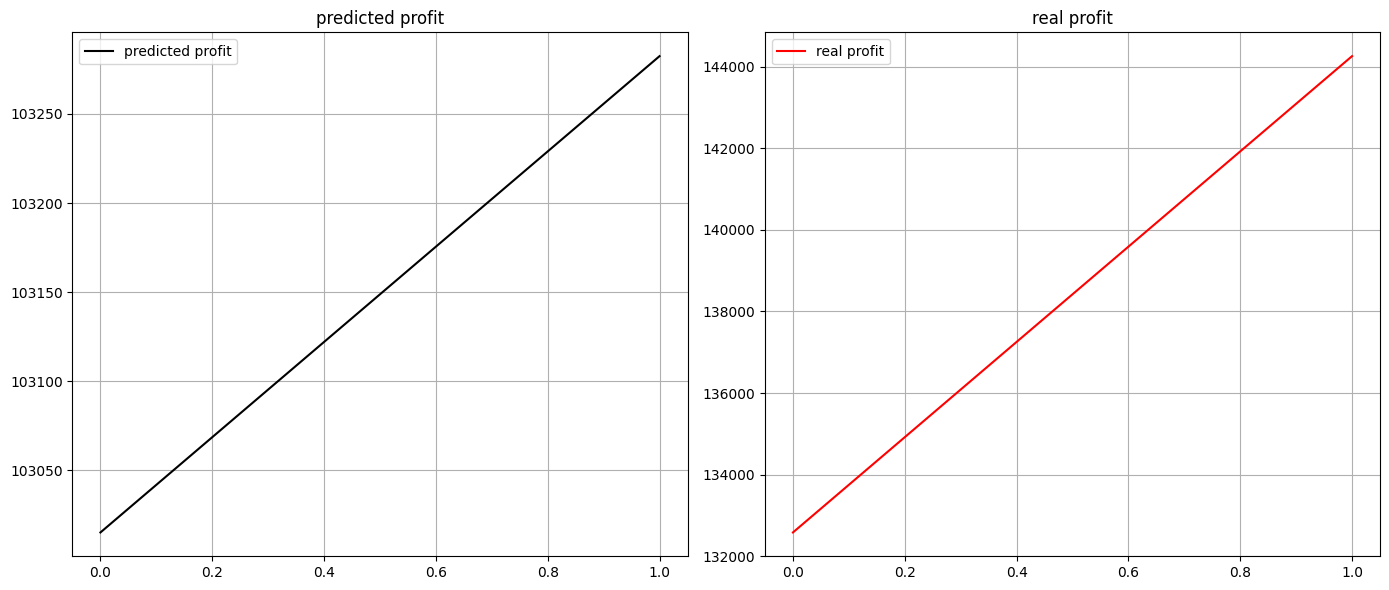

In [9]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(predicted_and_real_profit[0], color="black", label="predicted profit")
plt.title("predicted profit")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(predicted_and_real_profit[1], color="red", label="real profit")
plt.title("real profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()